# K-Means Clustering 

---

This document provides a concise overview of the KMeans clustering process, including data generation, visualization, optimal cluster selection using the Elbow method, and final model training. It is designed to serve as a clear and practical reference for applying KMeans in real-world scenarios.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

This code generates a synthetic dataset using `make_blobs`, creating 500 samples grouped into 4 clusters. Each cluster has a standard deviation of 0.8, which controls how tightly the points are grouped. The `random_state=42` ensures reproducibility so the dataset remains the same every time the code is executed.


In [2]:
blobs_data, blobs_clusters = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=0.8,
    random_state=42,
)

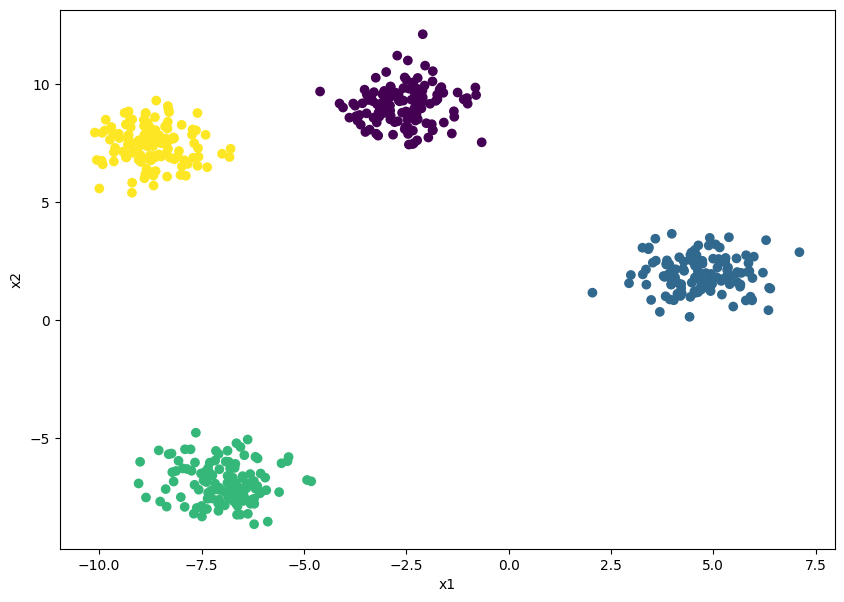

In [3]:
plt.figure(figsize=[10, 7])
plt.scatter(blobs_data[:, 0], blobs_data[:, 1], c=blobs_clusters)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

The snippet loops through several values of `k` and collects the inertia for each clustering run. After all values are computed, a line chart is drawn to visualize how inertia changes as the number of clusters increases. The point where the curve noticeably slows down - the “elbow” - helps determine the most suitable number of clusters for the dataset.



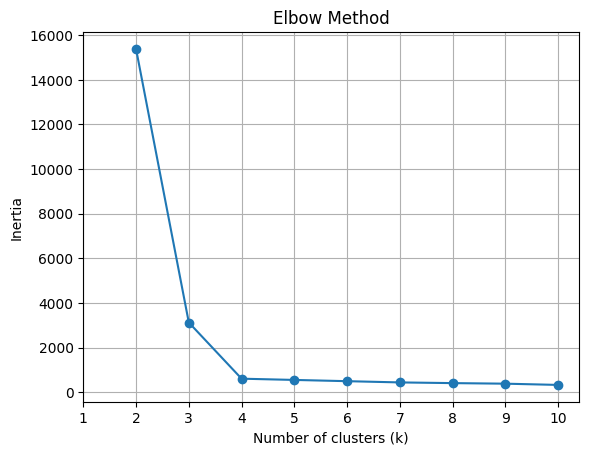

In [16]:
inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(blobs_data)
    inertia.append(km.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Here, the KMeans model is initialized with a chosen number of clusters and the `k-means++` initialization strategy for better starting centers. The model is then fitted to the dataset, allowing it to learn the cluster structure based on the selected value of `k`.


In [4]:
k = 5

k_means = KMeans(
    n_clusters=k,
    init='k-means++'
)

k_means.fit(blobs_data)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


After the model is trained, the cluster centers become available through `k_means.cluster_centers_`. Assigning them to `predict_clusters` simply stores these coordinates, making it easy to inspect or use them later in the analysis.

In [5]:
predict_clusters = k_means.cluster_centers_
predict_clusters

array([[ 4.70543542,  1.93371842],
       [-8.53936451,  6.6722435 ],
       [-6.97669736, -6.89958795],
       [-2.58361185,  9.07680526],
       [-8.84063369,  7.9861719 ]])

The model’s assigned labels are collected from `k_means.labels_`, indicating the cluster of each data point. These labels are then used to color the scatter plot, giving a clear visual separation between the clusters. The red markers highlight the discovered cluster centers, making it easy to see how the algorithm positioned them relative to the data.


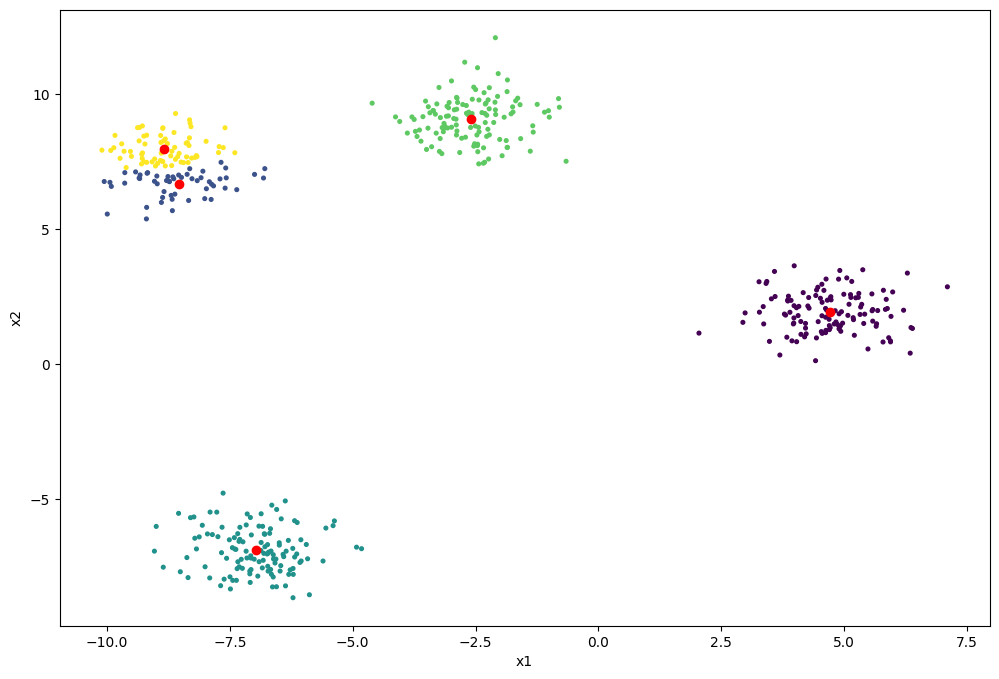

In [6]:
labels = k_means.labels_ 

plt.figure(figsize=[12, 8])
plt.scatter(blobs_data[:, 0], blobs_data[:, 1], c=labels, s=7)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()